##**DS 3000 - Practicum 1**

**Authors**: Jason Ordonez Rodriguez, Sharmarke Khalid, Harshini Gaddam, Nandhini Natarajan

**Date:** 10-5-2024

#  **Q1: The Data Science Problem**:
*In your own words, formulate the Data Science problem that you were given*

Airline delays are not only frustrating for passengers but can also have serious affects for those traveling with urgency. To minimize the negative repercussions of delays and improve passenger satisfaction, understanding the impact of flight delays, particularly during peak travel months, is essential. For this practicum, we are working with sample data from the Bureau of Transportation Statistics which tracks flight hours, distances, and both arrival and departure delays across airports in the U.S. The sample data focuses on flights that departed from or departed to Arizona, Nevada, and California in 2019. Our analysis will focus on identifying patterns in flight delays, tracking air traffic at key airports in these states, and determining which airlines are most prone to delays during peak travel months. The goal is to provide insights that can help airlines and airport management reduce delays, enhance scheduling , and most importantly improve passenger experience.



# **Q2: Prepare the Data**:

1.   Evaluate the dataset to determine if ALL variables are represented in their expected type. Convert variables to suitable data types (if needed).

2.  Analyze the data to determine what preprocessing steps are needed. Perform the required data preparation steps. At a minimum, ensure that you handle both missing and invalid values. Justify the approach that is taken to prepare the data for analysis.

3. At a high level explain what the dataset is about and provide at least three visualizations to support your explanation of DS problem from Question 1. Note: this explanation and visualizations should be relevant to the DS Problem in question 1.





**Import necessary libraries for analysis**





In [1]:
%pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Note: you may need to restart the kernel to use updated packages.


# **2.1** Evaluate the dataset to determine if ALL variables are represented in their expected type. Convert variables to suitable data types.

**The next two cells, load the file and makes sure everything is loaded correctly as well as checks the datatypes of the columns**

In [2]:
# load file
FILENAME = "2019_ONTIME_REPORTING_FSW.csv"
flight_data_df = pd.read_csv(FILENAME)

# checks the dimensions and inspects content in data
print('There are {} rows and {} columns in this dataset.'.format
              (flight_data_df.shape[0], flight_data_df.shape[1]))

# prints the first 4 rows of the dataset to get a glimpse of the data
flight_data_df.head(4)

There are 1897503 rows and 14 columns in this dataset.


,FL_DATE,CARRIER_CODE,TAIL_NUM,FL_NUM,ORIGIN,ORIGIN_ST,DEST,DEST_ST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,ELAPSED_TIME,DISTANCE
0,2019-10-01,AA,N916NN,2311,TUS,AZ,ORD,IL,828.0,0.0,1353.0,0.0,205.0,1437
1,2019-10-01,AA,N733UW,2315,PHX,AZ,DEN,CO,1907.0,0.0,2159.0,0.0,112.0,602
2,2019-10-01,AA,N140AN,2318,DFW,TX,LAX,CA,1904.0,104.0,2016.0,101.0,192.0,1235
3,2019-10-01,AA,N925AN,2325,SNA,CA,DFW,TX,1729.0,4.0,2215.0,3.0,166.0,1205


In [3]:
# prints out column information about the dataset
flight_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1897503 entries, 0 to 1897502
Data columns (total 14 columns):
 #   Column        Dtype  
---  ------        -----  
 0   FL_DATE       object 
 1   CARRIER_CODE  object 
 2   TAIL_NUM      object 
 3   FL_NUM        int64  
 4   ORIGIN        object 
 5   ORIGIN_ST     object 
 6   DEST          object 
 7   DEST_ST       object 
 8   DEP_TIME      float64
 9   DEP_DELAY     float64
 10  ARR_TIME      float64
 11  ARR_DELAY     float64
 12  ELAPSED_TIME  float64
 13  DISTANCE      int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 202.7+ MB


**Analysis on printed results:**


Based on the results from getting more information on the datatypes of each column we can see that there's a lot of changes to be made. We can identify  columns that need to be converted into more suitable types.

The following changes will be made for the unsuitable datatypes:

- For starters I noticed that we need to convert the ‘FL_Date’ column into a datetime datatype. This will help with calculating differences between dates. It’s better to store dates as datetime rather than as object types.


- The ‘CARRIER_CODE’, ‘TAIL_NUM’, and ‘FL_NUM’ columns will  also need to be converted to strings because they contain alphanumeric identifiers for flights and aircrafts. This will make it easier to concatenate columns together. For example we need to concatenate the ‘CARRIER_CODE’ column and the ‘Fl_NUM’ to create a new column to identify flights.



- The columns representing airports and states (‘ORIGIN’, ‘ORIGIN_ST’, ‘DEST’, and ‘DEST_ST’) need to be converted into a categorical datatype as these column contains a limited number of unique values. Its is better to have these columns as categorical rather than object datatypes.




- For these columns (‘DEP_TIME’, ‘ARR_TIME’, ‘DEP_DELAY’, and ‘ARR_DELAY’) I think the right move would be to convert them to integers to prepare them for any numeric calculations that we may do. From there we should convert them into a string datatype with zero padding to ensure that all data are consistent. This allows for easy concatenation of columns. For example ‘FL_DATE’ with ‘DEPARTURE_DATETIME’ and ‘ARRIVAL_DATETIME’. Finally, after concatenation, both ‘DEPARTURE_DATETIME’ and ‘ARRIVAL_DATETIME’ will be converted back into the datetime datatype to ensure consistency.


**This cell converts columns to suitable types**



In [4]:
# convert 'FL_DATE' to datetime format
flight_data_df['FL_DATE'] = pd.to_datetime(flight_data_df['FL_DATE'], format='%Y-%m-%d')

# initalzing variables to use for converting the columns
columns_to_string = ['CARRIER_CODE', 'TAIL_NUM', 'FL_NUM']
flight_data_df[columns_to_string] = flight_data_df[columns_to_string].astype('string')

# convert DEP_DELAY, ARR_DELAY, and times (DEP_TIME, ARR_TIME) to integers
columns_to_integer = ['DEP_DELAY', 'ARR_DELAY', 'DEP_TIME', 'ARR_TIME']
flight_data_df[columns_to_integer] = flight_data_df[columns_to_integer].apply(pd.to_numeric, errors='coerce').astype('Int64')

# zero padding for time-related columns and flight number
flight_data_df['FL_NUM'] = flight_data_df['FL_NUM'].astype('Int64').astype('string').str.zfill(4)
flight_data_df['DEP_TIME'] = flight_data_df['DEP_TIME'].astype('Int64').astype('string').str.zfill(4)
flight_data_df['ARR_TIME'] = flight_data_df['ARR_TIME'].astype('Int64').astype('string').str.zfill(4)

# converts origin and destination columns to categories
flight_data_df[['ORIGIN', 'ORIGIN_ST', 'DEST', 'DEST_ST']] = flight_data_df[['ORIGIN', 'ORIGIN_ST', 'DEST', 'DEST_ST']].astype('category')

# concatenation of columns
flight_data_df['FLIGHT_ID'] = flight_data_df['CARRIER_CODE'] + flight_data_df['FL_NUM']
flight_data_df['DEPARTURE_DATETIME'] = flight_data_df['FL_DATE'].astype('string') + ' ' + flight_data_df['DEP_TIME']
flight_data_df['ARRIVAL_DATETIME'] = flight_data_df['FL_DATE'].astype('string') + ' ' + flight_data_df['ARR_TIME']

# convert 'DEPARTURE_DATETIME' and 'ARRIVAL_DATETIME' into to datetime datatype
flight_data_df['DEPARTURE_DATETIME'] = pd.to_datetime(flight_data_df['DEPARTURE_DATETIME'], errors='coerce')
flight_data_df['ARRIVAL_DATETIME'] = pd.to_datetime(flight_data_df['ARRIVAL_DATETIME'], errors='coerce')

# print the changes
print("Updated columns:")
flight_data_df.info()

Updated columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1897503 entries, 0 to 1897502
Data columns (total 17 columns):
 #   Column              Dtype         
---  ------              -----         
 0   FL_DATE             datetime64[ns]
 1   CARRIER_CODE        string        
 2   TAIL_NUM            string        
 3   FL_NUM              string        
 4   ORIGIN              category      
 5   ORIGIN_ST           category      
 6   DEST                category      
 7   DEST_ST             category      
 8   DEP_TIME            string        
 9   DEP_DELAY           Int64         
 10  ARR_TIME            string        
 11  ARR_DELAY           Int64         
 12  ELAPSED_TIME        float64       
 13  DISTANCE            int64         
 14  FLIGHT_ID           string        
 15  DEPARTURE_DATETIME  datetime64[ns]
 16  ARRIVAL_DATETIME    datetime64[ns]
dtypes: Int64(2), category(4), datetime64[ns](3), float64(1), int64(1), string(6)
memory usage: 202.7 MB


#**2.2** Analyzing the data to determine what preprocessing steps are needed.

**This cell is to see how many missing data we are working with**

In [5]:
# checks for the missing values in each column from the dataset
missing_values = flight_data_df.isnull().sum()

# displays columns with missing values
print("\nMissing Values Count:")
print(missing_values)


Missing Values Count:
FL_DATE                   0
CARRIER_CODE              0
TAIL_NUM               4791
FL_NUM                    0
ORIGIN                    0
ORIGIN_ST                 0
DEST                      0
DEST_ST                   0
DEP_TIME              26707
DEP_DELAY             26715
ARR_TIME              28244
ARR_DELAY             31884
ELAPSED_TIME          31884
DISTANCE                  0
FLIGHT_ID                 0
DEPARTURE_DATETIME    26949
ARRIVAL_DATETIME      29196
dtype: int64


**Analysis on printed results:**

Based on the results, the missing data accounts for less than 2% of the entire dataset, with 31,884 missing rows out of over 1 million total rows. Removing this small percentage of rows will not have a significant impact on the analysis. Since the missing data occurs in key columns like **DEP_TIME** and **ARR_DELAY**, which are essential for analyzing flight delays, imputing values could introduce inaccuracies. Therefore, deleting the rows with missing data is the safest approach because the remaining dataset is still large enough to provide meaningful insights.


**This cells handles missing data**

In [6]:
# drops missing values
flight_data_df = flight_data_df.dropna()

# checks to see if we are accurately deleted the missing data
missing_values = flight_data_df.isnull().sum()

# displays updated columns
print('There are {} rows and {} columns after dropping the missing values and creating new columns in this dataset.'.format
              (flight_data_df.shape[0], flight_data_df.shape[1]))
print("\nUpdated Missing Values Count:")
print(missing_values)

There are 1864429 rows and 17 columns after dropping the missing values and creating new columns in this dataset.

Updated Missing Values Count:
FL_DATE               0
CARRIER_CODE          0
TAIL_NUM              0
FL_NUM                0
ORIGIN                0
ORIGIN_ST             0
DEST                  0
DEST_ST               0
DEP_TIME              0
DEP_DELAY             0
ARR_TIME              0
ARR_DELAY             0
ELAPSED_TIME          0
DISTANCE              0
FLIGHT_ID             0
DEPARTURE_DATETIME    0
ARRIVAL_DATETIME      0
dtype: int64


#**2.3** At a high level explain what the dataset is about and provide at least three visualizations to support your explanation of DS problem from Question 1.


#**Explanation of the dataset**

The dataset highlights flight data from 2019, focusing on flights that originated or arrived in Arizona, Nevada, and California. Information in the dataset includes flight dates, airline carrier codes, flight numbers, airport codes, departure and arrive times, delays, and flight distances. The main goal in our analysis is to determine patterns in flight delays, air traffic volume, and airline performance in the three states. By analyzing, it allows us to recognize trends that affect passenger flight experiences and provide more understanding on how to minimize delays and improve scheduling.

 # **Visual one:** Bar Chart of Average Arrival/Departure Delays by Airline

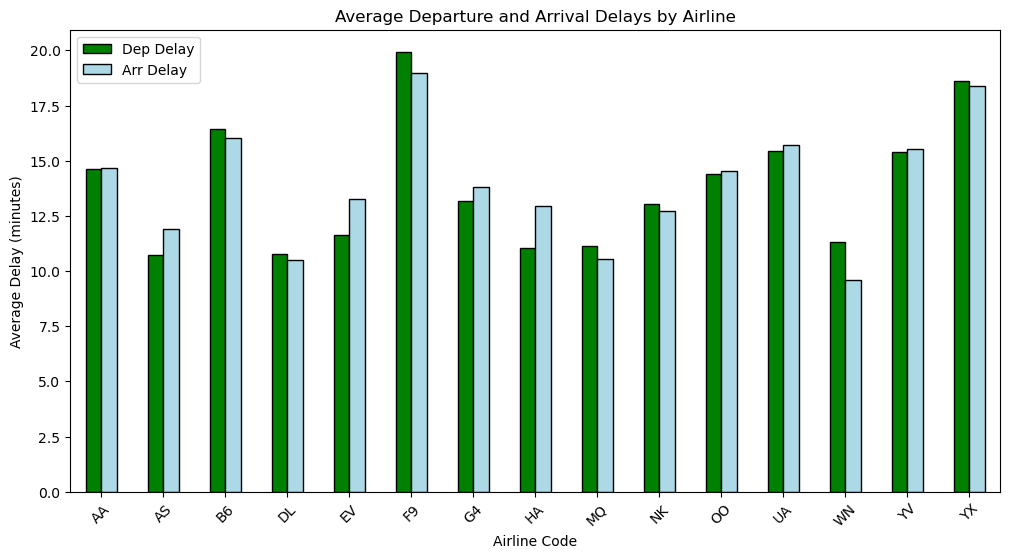

In [7]:
# groups the columns together and calculates the average
avg_delays = flight_data_df.groupby('CARRIER_CODE')[['DEP_DELAY', 'ARR_DELAY']].mean().reset_index()

# plots side by side bar chart using both 'DEP_DELAY' & 'ARR_DELAY' columns
avg_delays.plot(kind='bar', x='CARRIER_CODE', y=['DEP_DELAY', 'ARR_DELAY'], figsize=(12, 6), color=['green', 'lightblue'], edgecolor='black')

# styles the graph
plt.title('Average Departure and Arrival Delays by Airline')
plt.xlabel('Airline Code')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)
plt.legend(['Dep Delay', 'Arr Delay'])
plt.show()

**Explanation of the First graph:**

For the first visualization, a bar graph highlighted the average departure and arrival delays for various airlines. The green bars represent the average departure delays, while the light blue bars display the average arrival delays. Based on the bar graph, many airlines tend to experience longer arrival delays compared to departure delays. Airlines such as F9, UA, YX have the highest averages delays in this visual, overall. On the contrary, airlines such as WN and MQ show lower average delays. This suggests that arrival delays are more frequent aross the majority of airlines.






#**Visual 2:** Total Delays Over Time in 2019

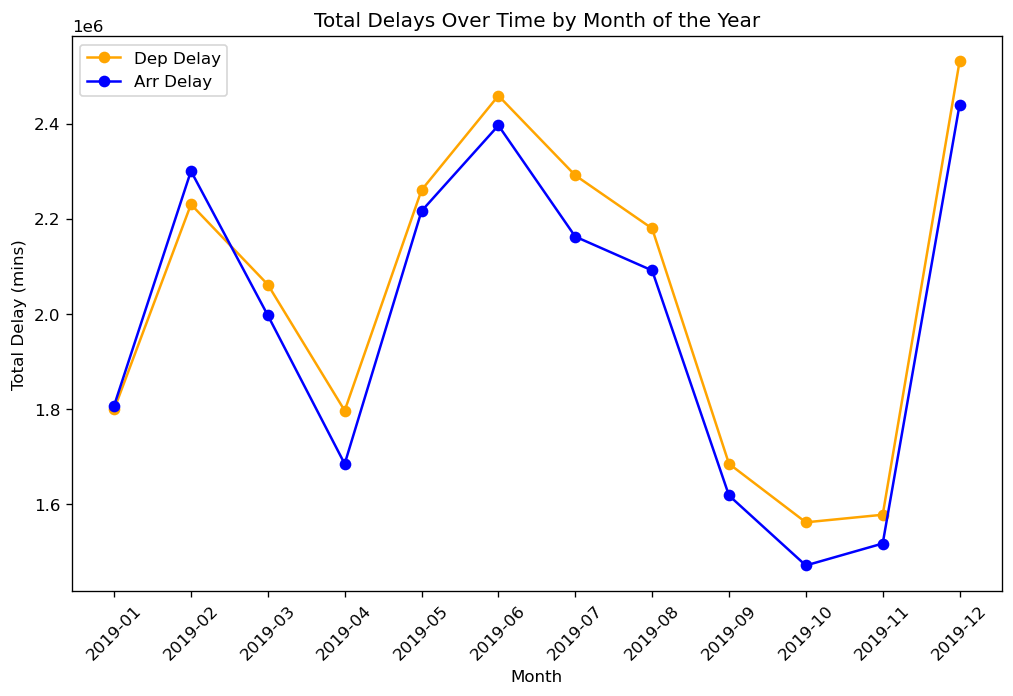

In [8]:
# extract the month and year from FL_DATE after it was converted
flight_data_df['Yr_Month'] = flight_data_df['FL_DATE'].dt.to_period('M')

# group the month and sum the delays together
monthly_delays = flight_data_df.groupby('Yr_Month')[['DEP_DELAY', 'ARR_DELAY']].sum().reset_index()

# create the line graph
plt.figure(figsize=(10, 6),dpi=120)
plt.plot(monthly_delays['Yr_Month'].astype(str), monthly_delays['DEP_DELAY'], label='Dep Delay', color='orange', marker='o')
plt.plot(monthly_delays['Yr_Month'].astype(str), monthly_delays['ARR_DELAY'], label='Arr Delay', color='blue', marker='o')

# style the line graph
plt.title('Total Delays Over Time by Month of the Year')
plt.xlabel('Month')
plt.ylabel('Total Delay (mins)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

**Explanation of the Second graph:**

For the second graph, a line chart was used to visualize the total departure and arrival delays over time on a monthly basis throughout 2019. This is very helpful for identifying trends and seasonal patterns in delays. It also illustrates perfectly which months experienced the most disruptions. Based on the visuals, we can see that disruptions peak in November and December, followed by the second highest month being June. This could be due to many reasons, but the most obvious is the holidays. We can see the lowest point of the line plot is in September, and this could be due to less travel occurring during that time. It was interesting to see how the delays fluctuate throughout the months.

#**Visual 3:** Airports with the most Delays in the month with the highest delays

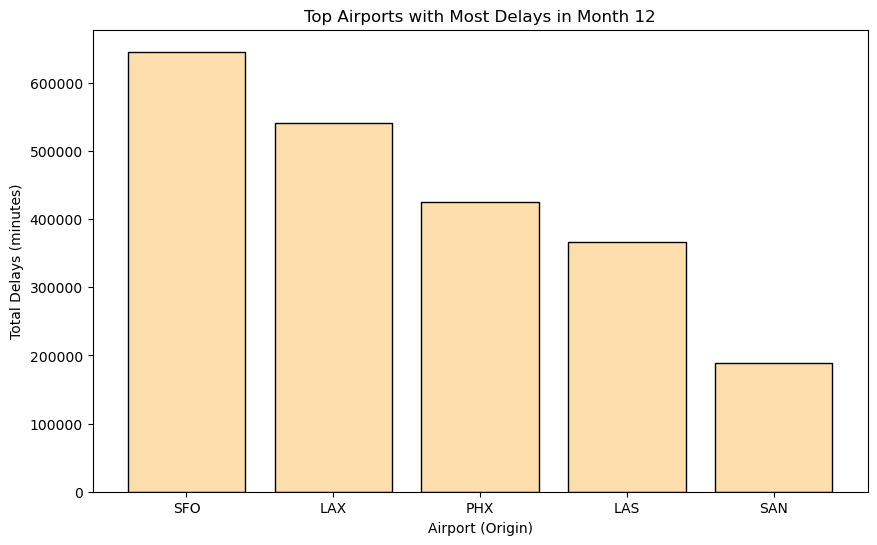

In [9]:
# extract the month from 'FL_DATE'
flight_data_df['Month'] = flight_data_df['FL_DATE'].dt.month

# group by the month and sum up both 'DEP_DELAY' and 'ARR_DELAY'
monthly_delays = flight_data_df.groupby('Month')[['DEP_DELAY', 'ARR_DELAY']].sum().reset_index()

# identify the month with the most total delays
monthly_delays['Total_Delay'] = monthly_delays['DEP_DELAY'] + monthly_delays['ARR_DELAY']
most_delayed_month = monthly_delays.loc[monthly_delays['Total_Delay'].idxmax(), 'Month']

# filter the dataset to only include flights from the month with the most delays
most_delayed_month_data = flight_data_df[flight_data_df['Month'] == most_delayed_month]

# group by 'ORIGIN' and calculate total delays
airport_delays = most_delayed_month_data.groupby('ORIGIN', observed=True)[['DEP_DELAY', 'ARR_DELAY']].sum().reset_index()

# calculate total delays by airport and sort the airports by the highest delays
airport_delays['Total_Delay'] = airport_delays['DEP_DELAY'] + airport_delays['ARR_DELAY']
most_delayed_airports = airport_delays.sort_values(by='Total_Delay', ascending=False).head()


# style and plot graph
plt.figure(figsize=(10, 6))
plt.bar(most_delayed_airports['ORIGIN'], most_delayed_airports['Total_Delay'],
        color='navajowhite', edgecolor='black')
plt.xlabel('Airport (Origin)')
plt.ylabel('Total Delays (minutes)')
plt.title(f'Top Airports with Most Delays in Month {most_delayed_month}')
plt.show()

**Explanation of the Third graph:**

In the third visualization, the bar chart highlights the top five airports that have the most amount of delays in December. The data is the total departure and arrival delays of the airports combined. When analyzing the graph, SFO experiences the most amount of delays, which is followed by LAX and then PHX. Altogether, these airports have the highest cumulative delays. This result is accurate as these airports are known to have high traffic volumes. LAS and SAN also experience significant amounts of delays, but not as high as the other three airports. Overall, the visualization displays the density of delays, specifically in top California airports.




#**Question 3:**

1. Explore patterns in the region i.e. the 3 states (AZ, NV, CA). Determine which region has the most air traffic. Comment on your findings and visualize the results. Note: it's important to explain your rational for determining what is "the most air traffic". For example, are you evaluating the frequency of flights or total flight time. Justify your response.


2. For each region i.e. the 3 states (AZ, NV, CA), analyze the most popular outbound/destination airports. For example, if a flight originated in CA (at any of its airports), where do they often go? Comment on your findings and visualize the results for the top 5 destinations.


3. For each region, calculate the proportion* of flights from each airline/operator. Visualize the top 10 results. Explain the results.
*Hint: Don't forget that proportion is an explicit requirement.


#**3.1** Determineing which region has the most air traffic







**Justification for calculating the total number of flights to determine which region has the most air traffic:**

When I think of the region with the most traffic, I think the total number of flights would be a good indicator to determine this as it would give us insights into the frequency of fights in AX, NV, and CA. Tracking the number of flights helps us understand which states are the busiest and gives an overall picture of the air traffic volume in each region.




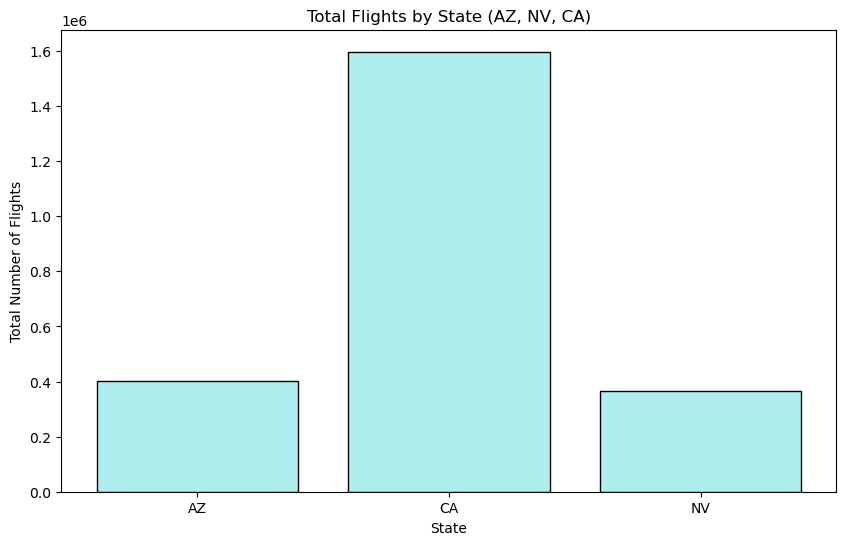

In [10]:
# count flights based on the origin state
origin_flights = flight_data_df.groupby('ORIGIN_ST', observed=False)['FLIGHT_ID'].count().reset_index()
origin_flights.columns = ['State', 'Total_Flights_Origin']

# count flights based on the destination state
destination_flights = flight_data_df.groupby('DEST_ST', observed=False)['FLIGHT_ID'].count().reset_index()
destination_flights.columns = ['State', 'Total_Flights_Dest']

# merge both orgin & destination counts to get total flights by state
total_flights_by_state = origin_flights.merge(destination_flights, on='State', how='outer')
total_flights_by_state['Total_Flights'] = total_flights_by_state['Total_Flights_Origin'] + total_flights_by_state['Total_Flights_Dest']

# filter states so we only get flights from the three states
selected_states = total_flights_by_state[total_flights_by_state['State'].isin(['AZ', 'NV', 'CA'])]

# plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(selected_states['State'], selected_states['Total_Flights'], color='paleturquoise', edgecolor='black')

# style the graph
plt.xlabel('State')
plt.ylabel('Total Number of Flights')
plt.title('Total Flights by State (AZ, NV, CA)')
plt.show()

**Explanation of the graph:**

This bar graph shows the total number of flights originating or arriving in Arizona, California and Nevada in 2019. The graph shows that California is the state with the most traffic control compared to Arizona and Nevada. This suggests that California is the busiest state in terms of air traffic among the three and this is likely due to its larger population and the presence of major international airports in the state.



#**3.2:** Analyzing The most popular outbound/destination airports

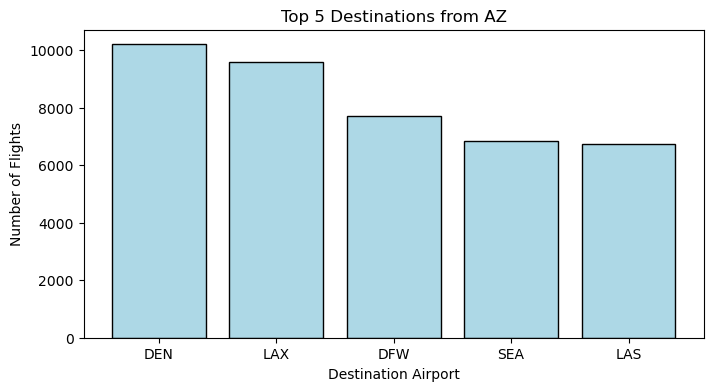

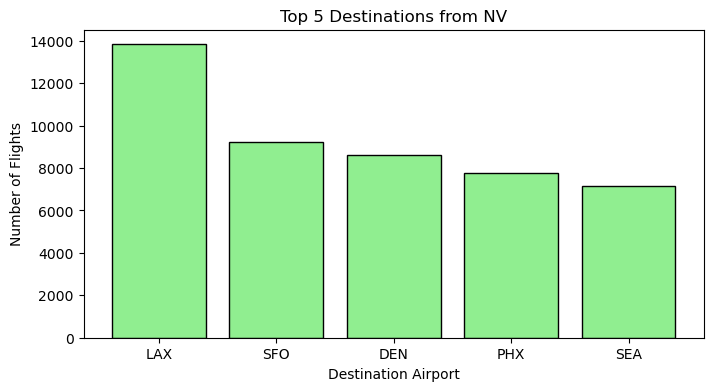

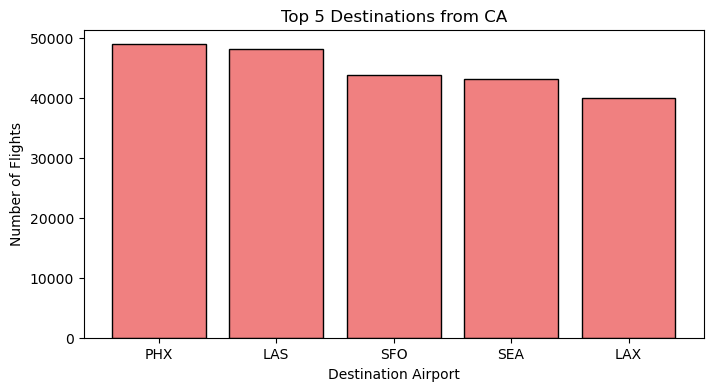

In [11]:
# variables that are gonna be used to use function
index = 0
states = ['AZ', 'NV', 'CA']
colors = ['lightblue', 'lightgreen', 'lightcoral']

def plot_top5_destinations(state, df, color):

  """
  Plots the top 5 destination airports for flights originating from a given state.

  Parameters:
  state (str): The abbreviation of the state
  df (DataFrame): The dataframe containing flight data
  color (str): The color to be used in bar graph.

  Returns: nothing
  """

  # filters data for the given state
  state_data = df[df['ORIGIN_ST'] == state]

  # counts the number of flights to each destination
  destination_counts = state_data.groupby('DEST', observed=False).size().reset_index(name='Flight_Count')

  # gets the top 5 destinations
  top_destinations = destination_counts.nlargest(5, 'Flight_Count')

  # styles the graph
  plt.figure(figsize=(8, 4))
  plt.bar(top_destinations['DEST'], top_destinations['Flight_Count'], color=color, edgecolor='black')
  plt.title(f'Top 5 Destinations from {state}')
  plt.xlabel('Destination Airport')
  plt.ylabel('Number of Flights')
  plt.show()


# loop through each state and color
for state in states:
    plot_top5_destinations(state, flight_data_df, color=colors[index])
    index += 1

**Explanation of the graphs:**

The bar charts display the top five destination airports in 2019 for flights that originate from Arizona, California, and Nevada.

- Denver (DEN) and Los Angeles (LAX) are top destination airports for Arizona flights.

- Most flights from California are designated to Phoenix (PHX) and Las Vegas (LAS).

- Lastly, Nevada flights mainly head to Los Angeles (LAX) and San Francisco (SFO).

The bar charts in the visualization helps highlight the top travel routes that originate from these states, and point out the busiest airports flight connections in these three region.

#**3.3:** Proportions of flights from each airline/operator

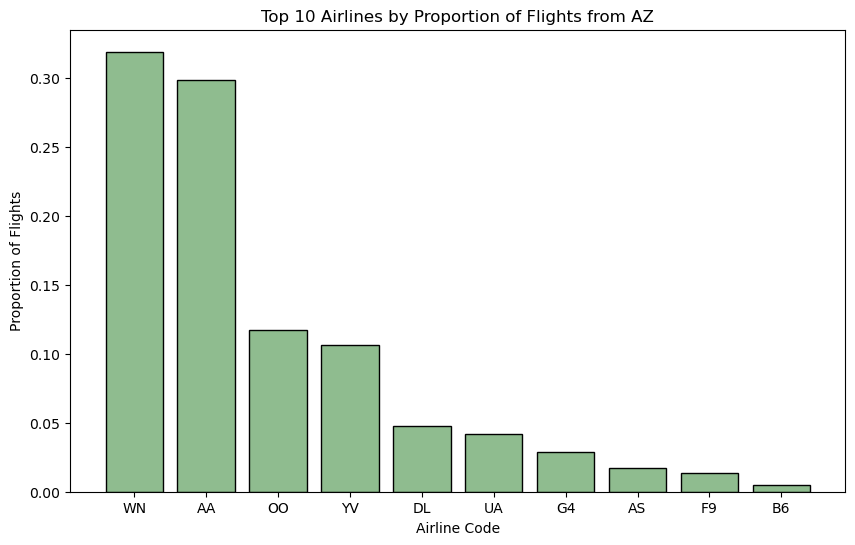

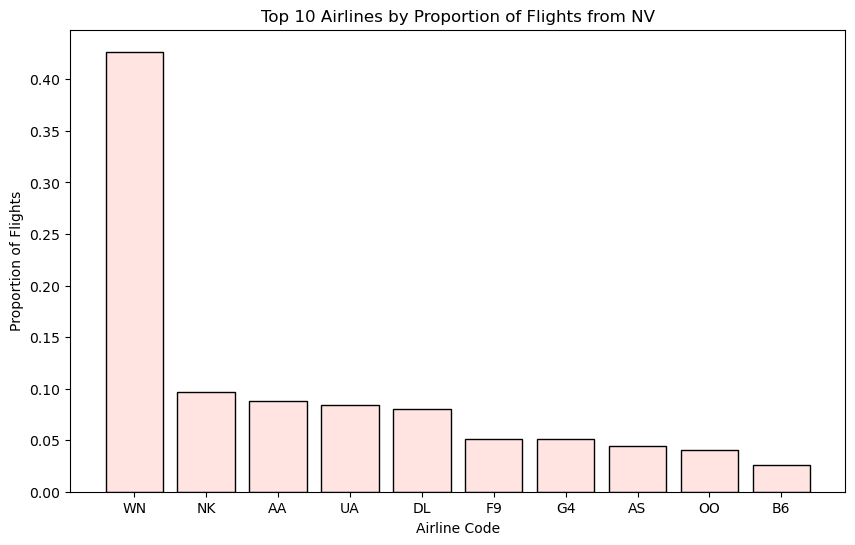

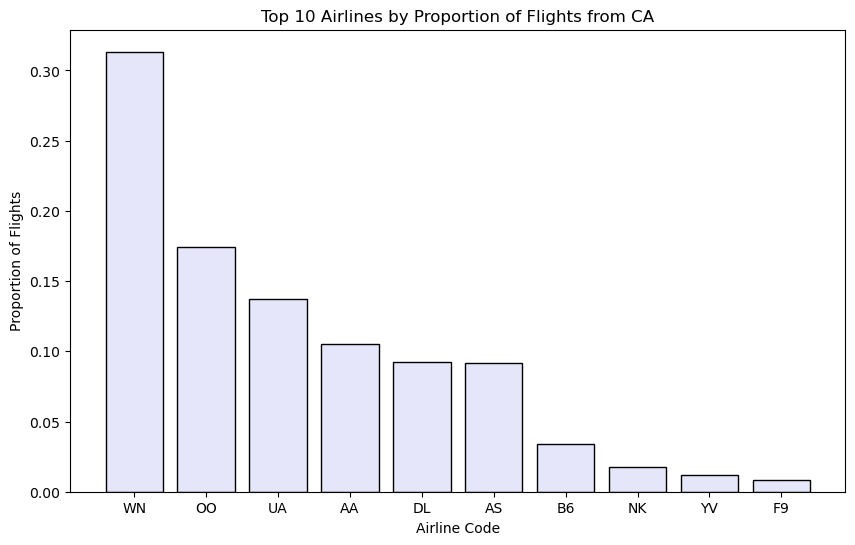

In [12]:
# variables that are gonna be used to use function
states = ['AZ', 'NV', 'CA']
colors = ['darkseagreen', 'mistyrose', 'lavender']
index = 0


def plot_airline_proportions(state, df, color):
    """
    To calculate and visualize the top 10 airlines by flight proportion for a given state.

    Parameters:
    state (str): The state abbreviation
    df (DataFrame): The dataframe containing flight data.
    color (str): The color for the bar plot

    Returns: nothing
    """

    # filter data to get the state
    state_data = df[df['ORIGIN_ST'] == state]

    # group the airline/operator and count the number of flights
    airline_flight_counts = state_data.groupby('CARRIER_CODE')['FLIGHT_ID'].count().reset_index()

    # calculate the total number of flights in the state
    total_flights = airline_flight_counts['FLIGHT_ID'].sum()

    # calculate the proportion of flights for each airline
    airline_flight_counts['Proportion'] = airline_flight_counts['FLIGHT_ID'] / total_flights

    # sort and select the top 10 airlines by proportion
    top_airlines = airline_flight_counts.nlargest(10, 'Proportion')

    # style and plot the graph
    plt.figure(figsize=(10, 6))
    plt.bar(top_airlines['CARRIER_CODE'], top_airlines['Proportion'], color=color, edgecolor='black')
    plt.title(f'Top 10 Airlines by Proportion of Flights from {state}')
    plt.xlabel('Airline Code')
    plt.ylabel('Proportion of Flights')
    plt.show()

# loop through each state and color
for state in states:
    plot_airline_proportions(state, flight_data_df, color=colors[index])
    index += 1

**Explanation of graphs:**

The following bar graphs depict the amount of flights operated by the top 10 airlines in Arizona, Nevada, and California. Southwest Airlines (WN) is shown to dominate in all three states, specifically in the state of Nevada which accounts for more than 40% of flights. The airline dominates around 30% of all flights in Arizona and California. American Airlines (AA) and United Airlines (UA) have a strong presence in the states, but Southwest’s still comes on top. This emphasizes that Southwest Airlines is passengers top choice for air travel in all three states.The following bar graphs depict the amount of flights operated by the top 10 airlines in Arizona, Nevada, and California. Southwest Airlines (WN) is shown to dominate in all three states, specifically in the state of Nevada which accounts for more than 40% of flights. The airline dominates around 30% of all flights in Arizona and California. American Airlines (AA) and United Airlines (UA) have a strong presence in the states, but Southwest’s still comes on top. This emphasizes that Southwest Airlines is passengers top choice for air travel in all three states.

# Q4:
1. Explore the carriers within the dataset and demonstrate at least TWO (2) patterns that you identified.
Analyze the minimum, maximum and average arrival and departure delays for each Airline/Carrier.
Visualize the top 10 results. Explain the patterns in the delays and demonstrate:
1) which carriers are more prone to flight delays and 2) are the delays occurring more frequently in certain regions**?

**Tip: it is important to analyze the airlines across multiple airports and/or regions in order to conclude that they have a pattern of being late.**

## Q4.1
### Explore the carriers within the dataset and demonstrate at least TWO (2) patterns that you identified.

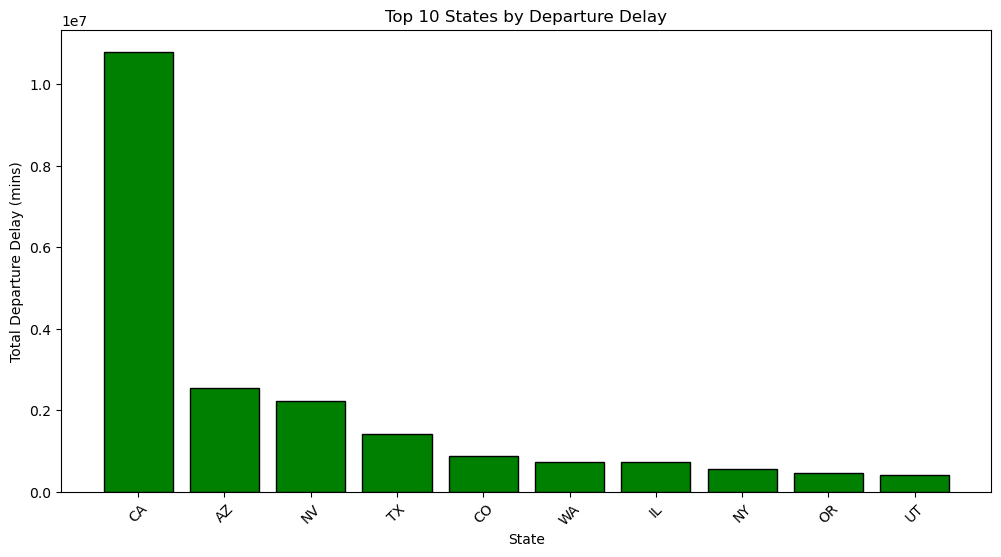

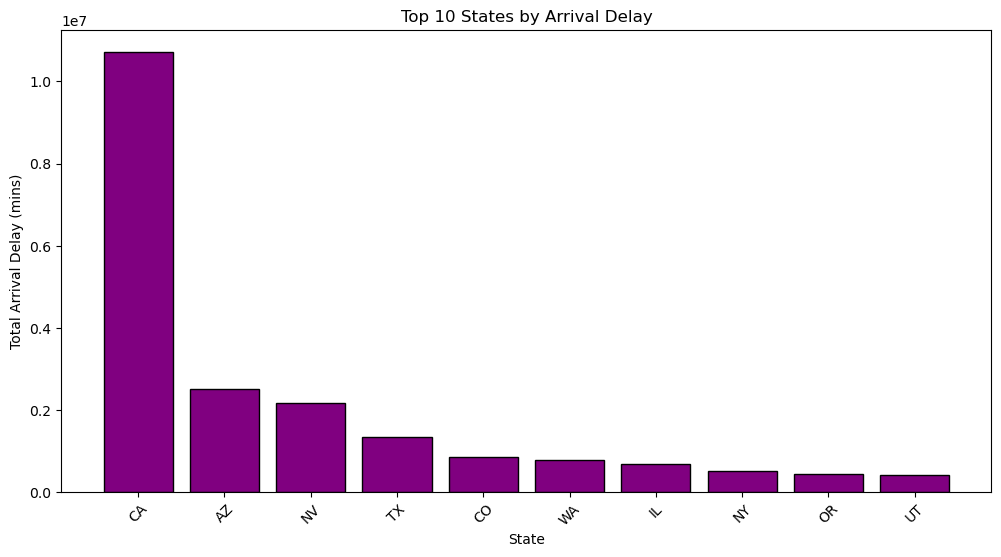

In [13]:
# get the delay by states destination
state_delays = flight_data_df.groupby(['DEST_ST'], observed=False).agg(
    dep_delay_total=('DEP_DELAY', 'sum'),
    arr_delay_total=('ARR_DELAY', 'sum')
).reset_index()

# Sort
sorted_delays = state_delays.sort_values(by='dep_delay_total', ascending=False)

# Plot the graph of total departure delay for states
plt.figure(figsize=(12, 6))
plt.bar(sorted_delays['DEST_ST'].head(10), sorted_delays['dep_delay_total'].head(10), color='green', edgecolor='black')
plt.title('Top 10 States by Departure Delay')
plt.xlabel('State')
plt.ylabel('Total Departure Delay (mins)')
plt.xticks(rotation=45)
plt.show()

# Plot the graph of total arrival delay for states
plt.figure(figsize=(12, 6))
plt.bar(sorted_delays['DEST_ST'].head(10), sorted_delays['arr_delay_total'].head(10), color='purple', edgecolor='black')
plt.title('Top 10 States by Arrival Delay')
plt.xlabel('State')
plt.ylabel('Total Arrival Delay (mins)')
plt.xticks(rotation=45)
plt.show()


## **Q4.2**
### Analyze the minimum, maximum and average arrival and departure delays for each Airline/Carrier. Visualize the top 10 results

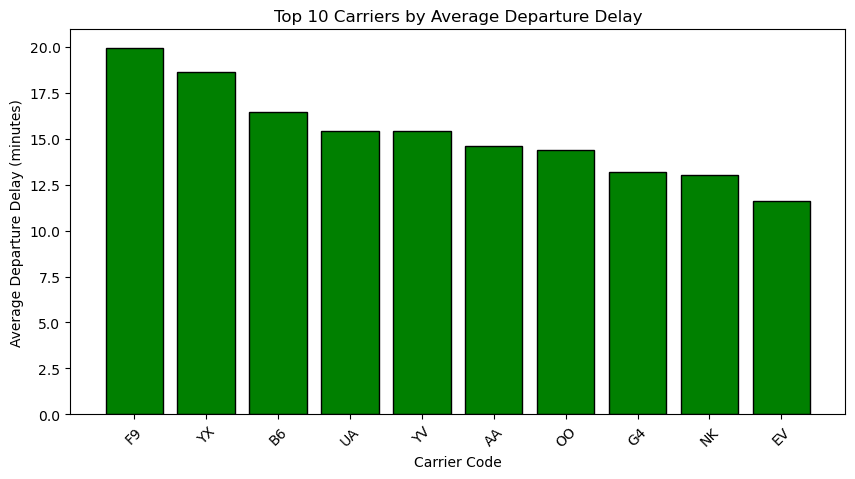

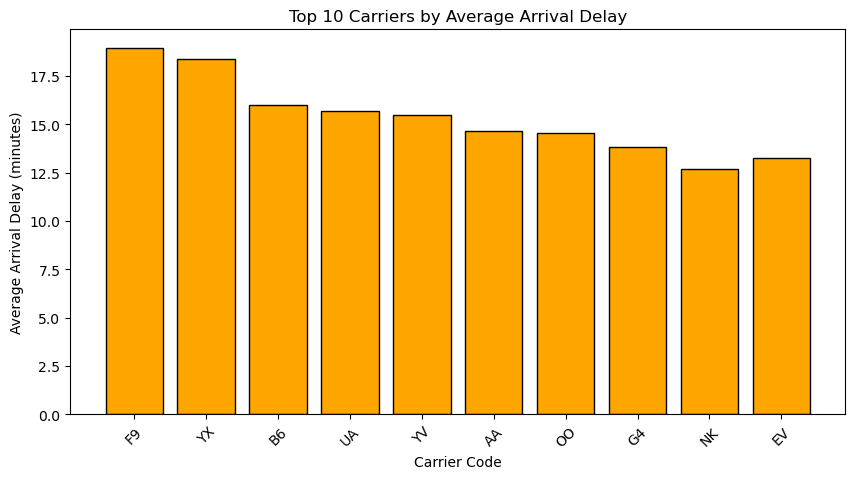

In [14]:
# create min max avg of data
carrier_delay_stats = flight_data_df.groupby('CARRIER_CODE').agg(
    avg_dep_delay=('DEP_DELAY', 'mean'),
    max_dep_delay=('DEP_DELAY', 'max'),
    min_dep_delay=('DEP_DELAY', 'min'),
    avg_arr_delay=('ARR_DELAY', 'mean'),
    max_arr_delay=('ARR_DELAY', 'max'),
    min_arr_delay=('ARR_DELAY', 'min')
).reset_index()

# Sort carriers by average departure delay
carrier_delay_stats_sorted = carrier_delay_stats.sort_values(by='avg_dep_delay',\
                                                             ascending=False)

# Visualize top 10 carriers by average departure delay
top_10_carriers = carrier_delay_stats_sorted.head(10)

# Plot for average departure delay
plt.figure(figsize=(10, 5))
plt.bar(top_10_carriers['CARRIER_CODE'], top_10_carriers['avg_dep_delay'], \
        color='green', edgecolor='black')
plt.title('Top 10 Carriers by Average Departure Delay')
plt.xlabel('Carrier Code')
plt.ylabel('Average Departure Delay (minutes)')
plt.xticks(rotation=45)
plt.show()

# Plot for average arrival delay
plt.figure(figsize=(10, 5))
plt.bar(top_10_carriers['CARRIER_CODE'], top_10_carriers['avg_arr_delay'], \
        color='orange', edgecolor='black')
plt.title('Top 10 Carriers by Average Arrival Delay')
plt.xlabel('Carrier Code')
plt.ylabel('Average Arrival Delay (minutes)')
plt.xticks(rotation=45)
plt.show()


1. Based on average departure and arrival delays, G4 (Allegiant Air) and YV (Mesa Airlines) are the airlines most likely to experience flight delays. B6 (JetBlue Airways) and F9 (Frontier Airlines) are the next most likely carriers to experience delays. When compared to other airlines in the dataset, these airlines consistently have larger average delays.
2. There is an increase in the frequency of delays in some areas, with particular destination states reporting noticeably greater overall arrival and departure delays. This pattern suggests that some routes or regions are more prone to flight delays. These regions may be affected by state-specific airport operations and or weather.


# Question 5


##### 5.1 Evaluate which airlines have the best performance in the region. Display the top 10 airlines.

In [15]:
# Group data by carrier and calculated delay stats
carrier_performance_stats = flight_data_df.groupby('CARRIER_CODE').agg(avg_dep_delay=('DEP_DELAY', 'mean'), avg_arr_delay=('ARR_DELAY', 'mean')).reset_index()

carrier_performance_stats['combined_delay'] = (carrier_performance_stats['avg_dep_delay'] + carrier_performance_stats['avg_arr_delay']) / 2
carrier_best_performance = carrier_performance_stats.sort_values (by='combined_delay', ascending=True)

# Top 10 airlines with the best performance (lowest combined delay)
top_10_best_performance = carrier_best_performance.head(10)
top_10_best_performance = top_10_best_performance.round(2)
print(top_10_best_performance)

   CARRIER_CODE  avg_dep_delay  avg_arr_delay  combined_delay
12           WN          11.33           9.59           10.46
3            DL          10.79          10.49           10.64
8            MQ          11.12          10.56           10.84
1            AS          10.71           11.9           11.31
7            HA          11.02          12.94           11.98
4            EV          11.63          13.24           12.44
9            NK          13.02           12.7           12.86
6            G4          13.16          13.81           13.48
10           OO           14.4          14.55           14.47
0            AA           14.6          14.66           14.63


To determine “best performance” I decided that the airlines with the lowest combined delays including departure and arrival would be considered the highest performance. This is because Airlines that have a consistently low delay rate would help contribute to increased reliability and have minimal disruptions. This way, the passengers would be able to have flights that depart and arrive on time. It also allows any passengers who have connecting flights to have a smoother flight and increases their brand image.



##### 5.2 For each airline, ensure that you calculate their total flight hours for each month. Explain and visualize the results for the top 10 airlines.


In [16]:
# calculate flight duration in minutes and convert to hours
flight_data_df['FLIGHT_DURATION'] = (flight_data_df['ARRIVAL_DATETIME'] - flight_data_df['DEPARTURE_DATETIME']).dt.total_seconds() / 60
flight_data_df['FLIGHT_HOURS'] = flight_data_df['FLIGHT_DURATION'] / 60


# get the month from the dataset and group to calculate the total hours
flight_data_df['Month'] = flight_data_df['FL_DATE'].dt.month
monthly_flight_hours = flight_data_df.groupby(['CARRIER_CODE', 'Month'])['FLIGHT_HOURS'].sum().reset_index()

# calculate total flight hours for each airline
total_flight_hours_per_airline = monthly_flight_hours.groupby('CARRIER_CODE')['FLIGHT_HOURS'].sum().reset_index()
total_flight_hours_per_airline = total_flight_hours_per_airline.sort_values(by='FLIGHT_HOURS', ascending=False)

# get the top 10 total flight hours
top_10_airlines_flight_hours = total_flight_hours_per_airline.head(10)
top_10_airlines_flight_hours = top_10_airlines_flight_hours.round(2)
# prints the top 10 airlines flight hours
print(top_10_airlines_flight_hours)

   CARRIER_CODE  FLIGHT_HOURS
12           WN     640003.98
0            AA     410755.27
10           OO     363264.68
3            DL     327946.48
1            AS     262515.35
11           UA     261900.52
6            G4      68737.32
7            HA      63459.77
13           YV      50064.83
8            MQ       6013.48


Visulization for 5.2

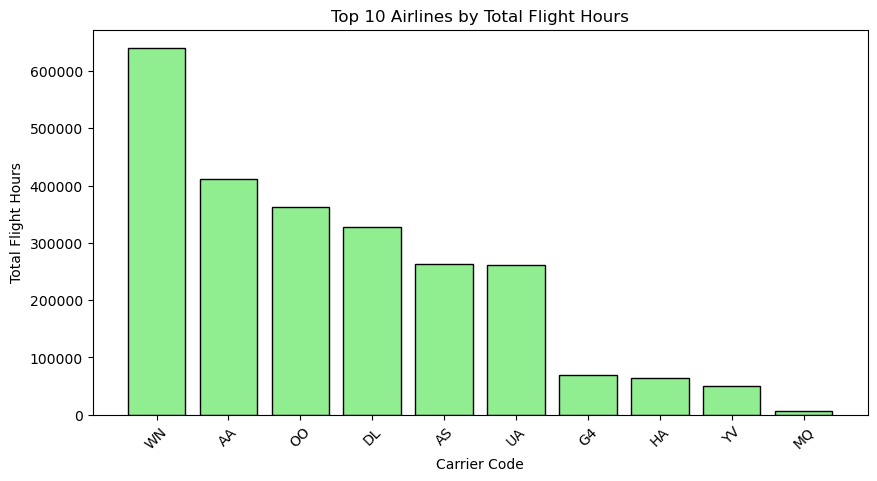

In [17]:
# Plot for the top 10 airlines by total flight hours
plt.figure(figsize=(10, 5))
plt.bar(top_10_airlines_flight_hours['CARRIER_CODE'], top_10_airlines_flight_hours['FLIGHT_HOURS'], color='lightgreen', edgecolor='black')
plt.title('Top 10 Airlines by Total Flight Hours')
plt.xlabel('Carrier Code')
plt.ylabel('Total Flight Hours')
plt.xticks(rotation=45)
plt.show()

Based on our bar graph of the the top 10 airlines by total flight hours, we can see that airlines such as WN which is Southwest Airlines, and AA or American Airlines have a higher amount of total flight hours. This can indicate that these airlines may be more established and may have flown more to the key states while thought that have a lower total hour may be newer or have more limited services.

The graph shows the total flight hours of all flights operated by each airline over the months in the dates. This helps show the entire capacity of the airline rather than the frequency of flights or just a certain time period where some airlines may not have flown as much. Using this visual representation, we can also compare the 10 highest airlines. I noticed that there is a drastic difference between the top 6 compared to the 7-10 highest as I was expecting all 10 to be rather similar.

##Question #6:
Select any THREE (3) aircraft***, and explore the data to analyze the following for each aircraft:

Indicate which airline operates the selected aircraft and where it often travels.
Arrival and departure delays at the airports where it traveled.
Create summary statistics on the distance traveled.
Analyze all the results in 6.1-6.3 to identify any patterns that are evident. Explain your findings and visualize ALL results.
***Note: the TAIL_NUM can help you to identify each unique aircraft.

<StringArray>
['N916NN', 'N733UW', 'N140AN', 'N925AN', 'N143AN', 'N816NN', 'N150NN',
 'N994AN', 'N404AN', 'N134AN',
 ...
 'N786AN', 'N59053', 'N946DN', 'N9019F', 'N969TW', 'N925DN', 'N920DN',
 'N341RW', 'N974JB', 'N67052']
Length: 4885, dtype: string

Aircraft: N733UW
Airline Carrier Code: AA
Top Origin Airports for N733UW:
  Airport  Frequency of Visits
0     PHX                   27
1     AUS                    4
2     ONT                    3
3     LAX                    2
4     DEN                    2
5     SAT                    2
6     CMH                    2
7     TUS                    2
8     SJC                    2
9     SMF                    2
Top Destination Airports for N733UW:
  Airport  Frequency of Visits
0     PHX                   27
1     SAT                    4
2     ONT                    3
3     DEN                    2
4     SMF                    2
5     LAX                    2
6     TUS                    2
7     CMH                    2
8     AUS        

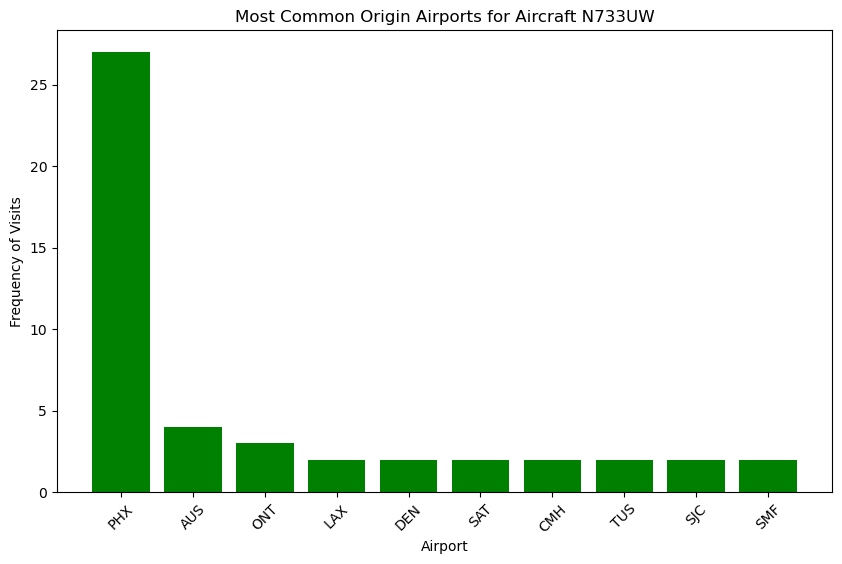

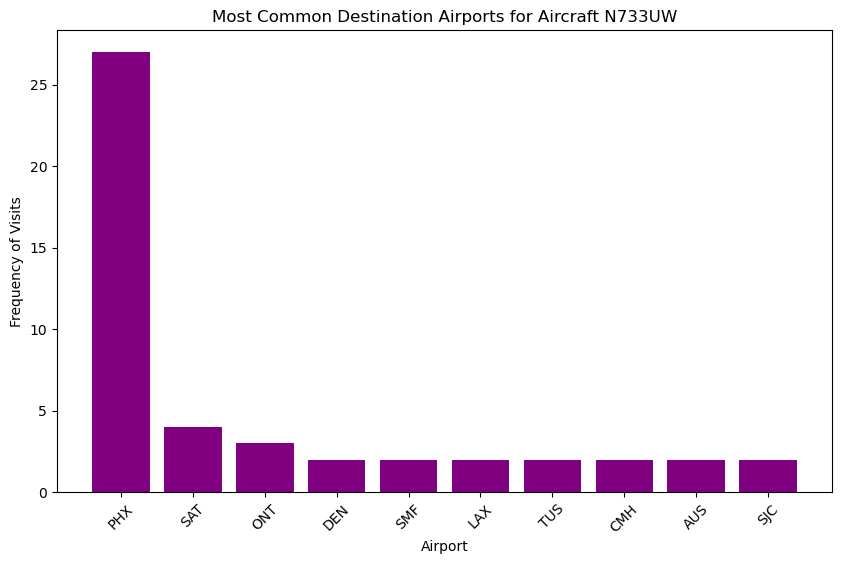


Aircraft: N150NN
Airline Carrier Code: AA
Top Origin Airports for N150NN:
  Airport  Frequency of Visits
0     DFW                  119
1     LAX                  116
2     SFO                   54
3     MIA                   42
4     SAN                   32
5     LAS                   27
6     ORD                   23
7     PHX                   21
8     BOS                    8
9     PHL                    6
Top Destination Airports for N150NN:
  Airport  Frequency of Visits
0     DFW                  118
1     LAX                  115
2     SFO                   54
3     MIA                   36
4     SAN                   32
5     ORD                   29
6     LAS                   27
7     PHX                   21
8     BOS                   12
9     MCO                    4


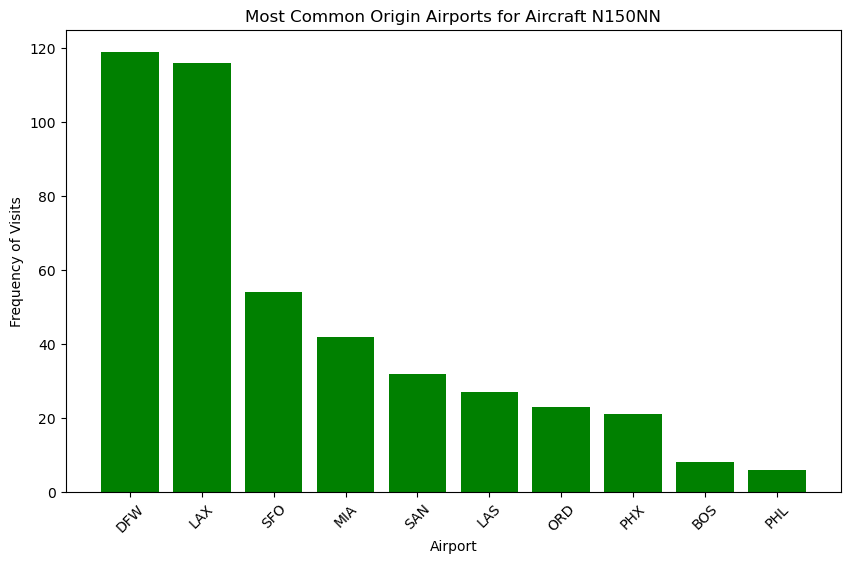

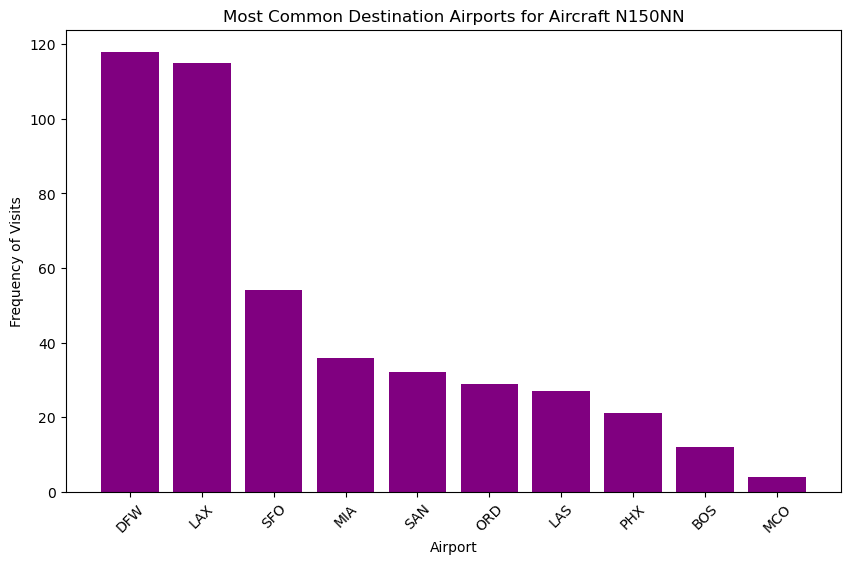


Aircraft: N134AN
Airline Carrier Code: AA
Top Origin Airports for N134AN:
  Airport  Frequency of Visits
0     LAX                  409
1     ORD                   84
2     HNL                   82
3     DFW                   58
4     OGG                   54
5     LAS                   31
6     KOA                   30
7     LIH                   29
8     BOS                   25
9     MIA                   13
Top Destination Airports for N134AN:
  Airport  Frequency of Visits
0     LAX                  414
1     ORD                   87
2     HNL                   82
3     DFW                   54
4     OGG                   53
5     KOA                   30
6     LAS                   30
7     LIH                   29
8     BOS                   23
9     MIA                   12


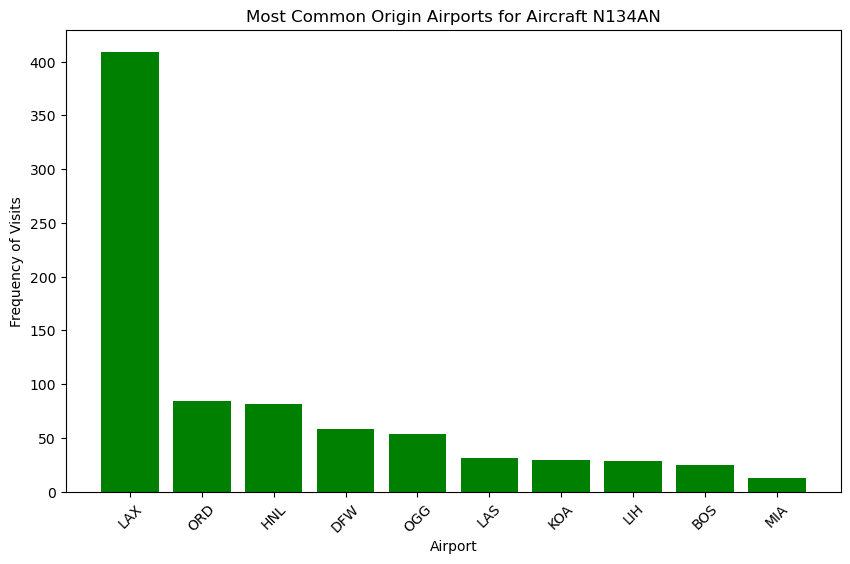

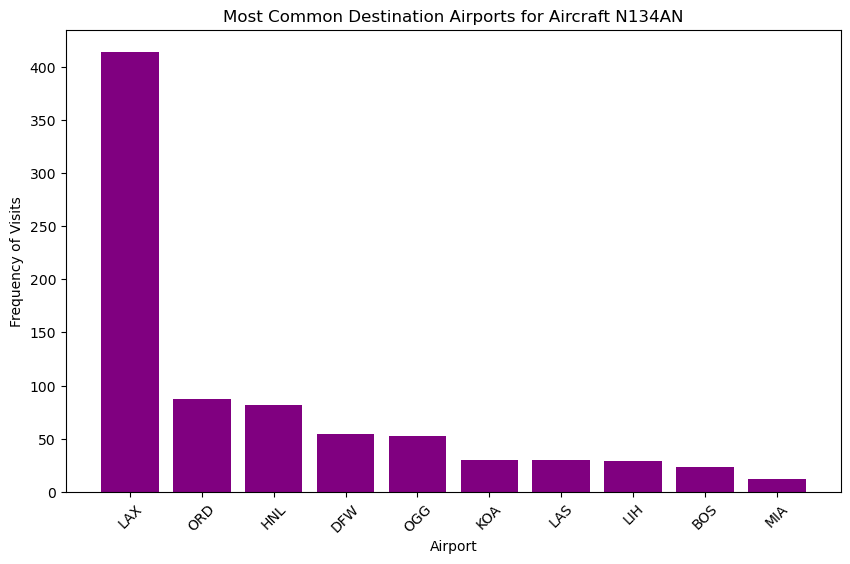

In [18]:
print(flight_data_df.TAIL_NUM.unique())

selected_aircrafts = ['N733UW', 'N150NN', 'N134AN']

# limits dataframe to 3 aircrafts values
decreased_df = flight_data_df[flight_data_df['TAIL_NUM'].isin(selected_aircrafts)]

# finds most frequent start and end airports and carrier
for aircraft in selected_aircrafts:
    print(f"\nAircraft: {aircraft}")
    aircraft_values = decreased_df[decreased_df['TAIL_NUM'] == aircraft]

    # finds carrier code
    airline_code = aircraft_values['CARRIER_CODE'].iloc[0]
    print(f'Airline Carrier Code: {airline_code}')

    # finds starting airport
    start = aircraft_values['ORIGIN'].value_counts().reset_index()
    start.columns = ['Airport', 'Frequency of Visits']

    # finds ending airports
    end = aircraft_values['DEST'].value_counts().reset_index()
    end.columns = ['Airport', 'Frequency of Visits']

    print(f"Top Origin Airports for {aircraft}:\n{start.head(10)}")
    print(f"Top Destination Airports for {aircraft}:\n{end.head(10)}")

    # uses matplotlib to plot top 10 most frequent starting airports per aircraft
    plt.figure(figsize=(10, 6))
    plt.bar(start['Airport'].head(10), start['Frequency of Visits'].head(10), color='green')
    plt.title(f"Most Common Origin Airports for Aircraft {aircraft}")
    plt.xlabel('Airport')
    plt.ylabel('Frequency of Visits')
    plt.xticks(rotation=45)
    plt.show()

    # uses matplotlib to plot top 10 most frequent ending airports per aircraft
    plt.figure(figsize=(10, 6))
    plt.bar(end['Airport'].head(10), end['Frequency of Visits'].head(10), color='purple')
    plt.title(f"Most Common Destination Airports for Aircraft {aircraft}")
    plt.xlabel('Airport')
    plt.ylabel('Frequency of Visits')
    plt.xticks(rotation=45)
    plt.show()


All 3 carrier codes had "AA", indicating the aircrafts belonged to American Airlines. The visualizations above show the most common starting and final trip airports. Aircraft N733UW primarily began and ended its trips at Phoenix Airport, N150NN frequently operated out of Dallas Fort Worth Airport, and N134AN mostly traveled to and from Los Angeles Airport. The consistent start and end locations for all three aircraft suggest that these airports serve as their respective home bases. The high frequency of these airports compared to others in the dataset highlights the operational efficiency and central role of each aircraft's home airport.

Aircraft: N733UW
Departure delay null values:
Airport                  0
Avg_Departure_Delay    130
dtype: int64
Arrival delay null values:
Airport                0
Avg_Arrival_Delay    130
dtype: int64


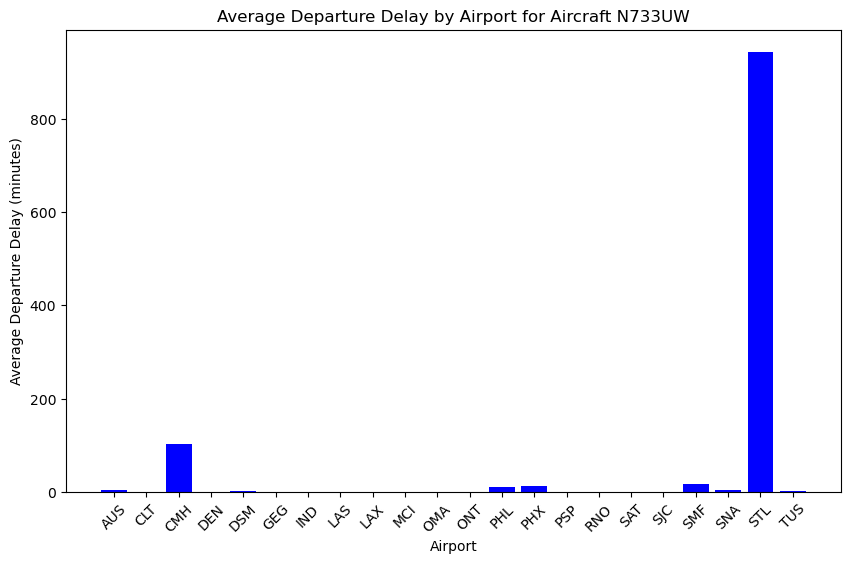

Average Departure Delays for N733UW by Airport:
    Airport  Avg_Departure_Delay
7       AUS                  5.0
25      CLT                  0.0
26      CMH                102.0
31      DEN                  0.0
34      DSM                  1.0
49      GEG                  0.0
63      IND                  0.0
69      LAS                  0.0
70      LAX                  0.0
77      MCI                  0.0
98      OMA                  0.0
99      ONT                  0.0
105     PHL                 10.0
106     PHX                11.67
112     PSP                  0.0
119     RNO                  0.0
124     SAT                  0.0
135     SJC                  0.0
137     SMF                 17.5
139     SNA                  4.0
141     STL                944.0
146     TUS                  1.0
Average Arrival Delays for N733UW by Airport:
    Airport  Avg_Arrival_Delay
7       AUS               86.0
25      CLT                0.0
26      CMH                9.0
31      DEN            

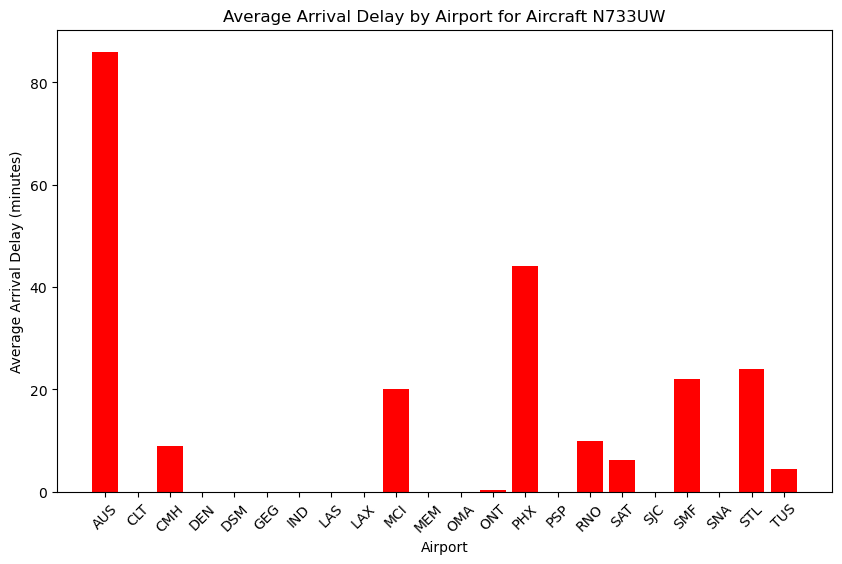

Aircraft: N150NN
Departure delay null values:
Airport                  0
Avg_Departure_Delay    133
dtype: int64
Arrival delay null values:
Airport                0
Avg_Arrival_Delay    133
dtype: int64


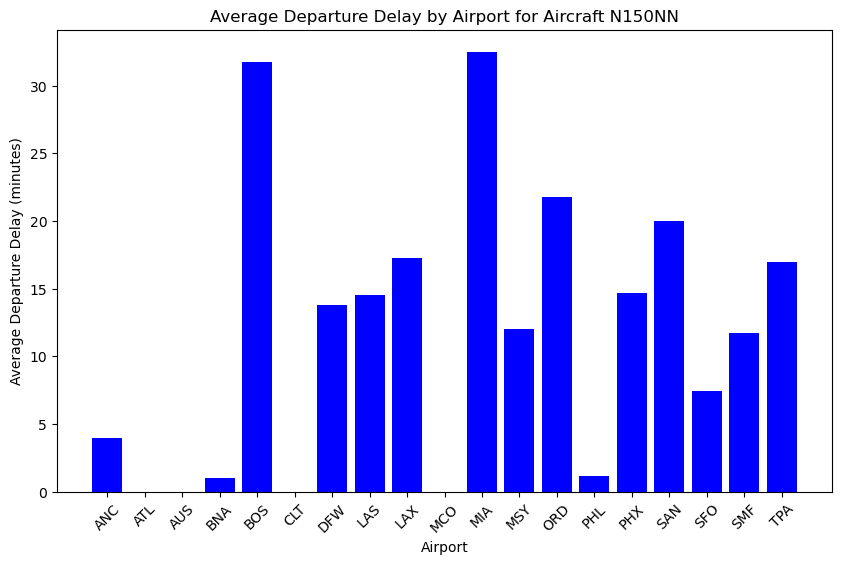

Average Departure Delays for N150NN by Airport:
    Airport  Avg_Departure_Delay
3       ANC                  4.0
5       ATL                  0.0
7       AUS                  0.0
16      BNA                  1.0
18      BOS                31.75
25      CLT                  0.0
32      DFW                13.83
69      LAS                14.52
70      LAX                17.29
78      MCO                  0.0
83      MIA                 32.5
92      MSY                 12.0
100     ORD                21.78
105     PHL                 1.17
106     PHX                14.67
123     SAN                19.97
131     SFO                 7.46
137     SMF                11.75
144     TPA                 17.0
Average Arrival Delays for N150NN by Airport:
    Airport  Avg_Arrival_Delay
3       ANC               15.0
5       ATL               26.5
7       AUS                0.0
16      BNA               92.0
18      BOS              16.58
25      CLT                0.0
32      DFW               12.

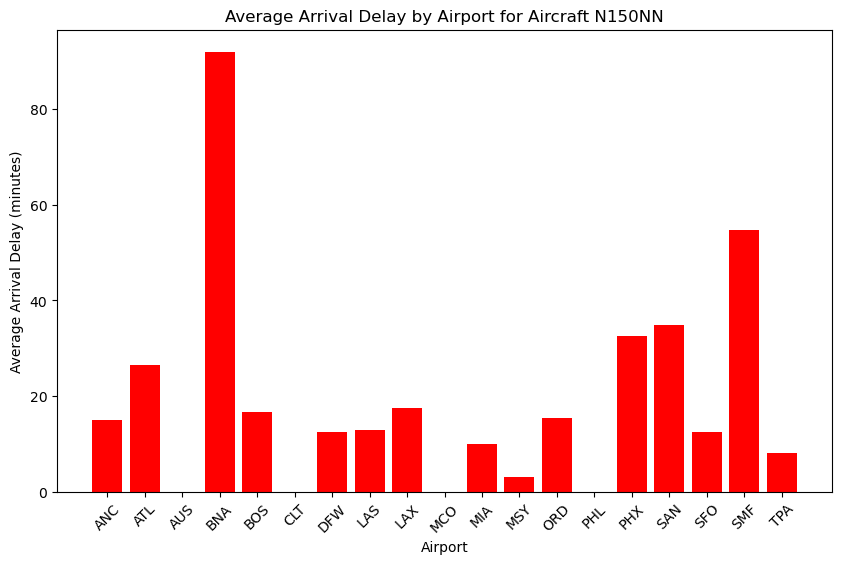

Aircraft: N134AN
Departure delay null values:
Airport                  0
Avg_Departure_Delay    132
dtype: int64
Arrival delay null values:
Airport                0
Avg_Arrival_Delay    131
dtype: int64


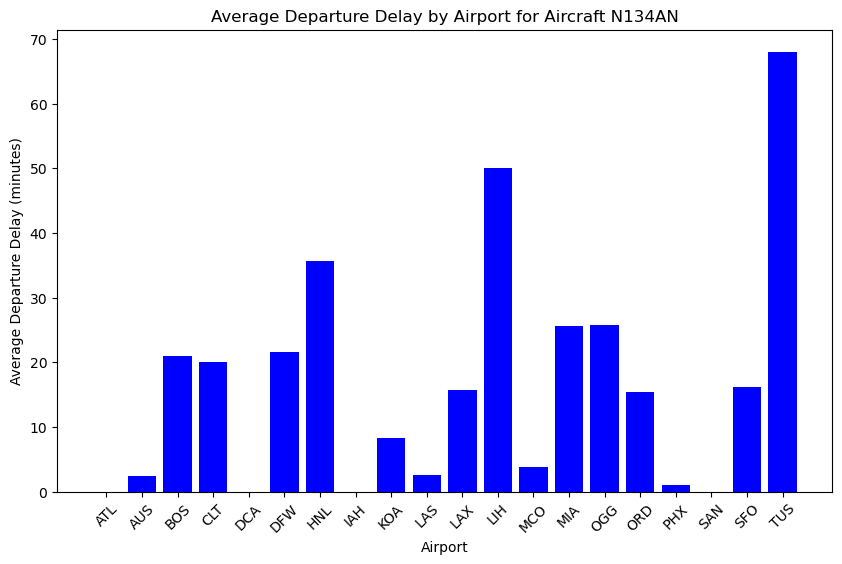

Average Departure Delays for N134AN by Airport:
    Airport  Avg_Departure_Delay
5       ATL                  0.0
7       AUS                  2.5
18      BOS                20.92
25      CLT                 20.0
30      DCA                  0.0
32      DFW                21.53
57      HNL                35.68
60      IAH                  0.0
68      KOA                  8.3
69      LAS                 2.61
70      LAX                15.73
73      LIH                50.03
78      MCO                 3.86
83      MIA                25.62
96      OGG                 25.8
100     ORD                15.44
106     PHX                  1.0
123     SAN                  0.0
131     SFO                16.12
146     TUS                 68.0
Average Arrival Delays for N134AN by Airport:
    Airport  Avg_Arrival_Delay
5       ATL                0.0
7       AUS                0.0
18      BOS               8.52
25      CLT                0.0
30      DCA               76.0
32      DFW               7

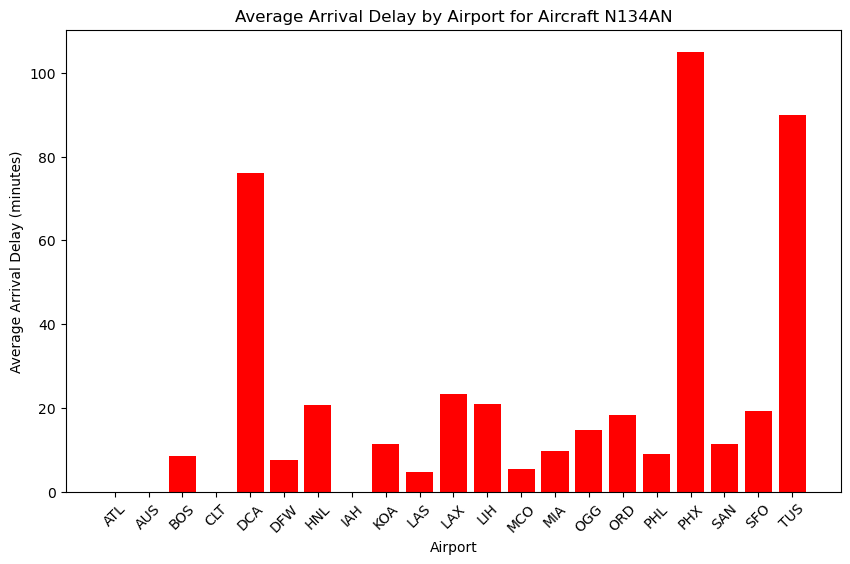

In [19]:

# finds avg delays in departures and arrivals
for aircraft in selected_aircrafts:
    print(f"Aircraft: {aircraft}")
    aircraft_data = decreased_df[decreased_df['TAIL_NUM'] == aircraft]

    # groups data by start and end airports and calculate mean delays
    dep_delay = aircraft_data.groupby('ORIGIN')['DEP_DELAY'].mean().round(2).reset_index()
    dep_delay.columns = ['Airport', 'Avg_Departure_Delay']
    arr_delay = aircraft_data.groupby('DEST')['ARR_DELAY'].mean().round(2).reset_index()
    arr_delay.columns = ['Airport', 'Avg_Arrival_Delay']

    print("Departure delay null values:")
    print(dep_delay.isnull().sum())
    print("Arrival delay null values:")
    print(arr_delay.isnull().sum())

    # Handle missing values for dep_delay and arr_delay
    dep_delay = dep_delay.dropna(subset=['Airport', 'Avg_Departure_Delay'])
    dep_delay['Avg_Departure_Delay'].fillna(0, inplace=True)

    arr_delay = arr_delay.dropna(subset=['Airport', 'Avg_Arrival_Delay'])
    arr_delay['Avg_Arrival_Delay'].fillna(0, inplace=True)

    # ensures correct data types
    dep_delay['Airport'] = dep_delay['Airport'].astype(str)
    dep_delay['Avg_Departure_Delay'] = pd.to_numeric(dep_delay['Avg_Departure_Delay'].round(2))

    arr_delay['Airport'] = arr_delay['Airport'].astype(str)
    arr_delay['Avg_Arrival_Delay'] = pd.to_numeric(arr_delay['Avg_Arrival_Delay'].round(2))

    # plots avg departure delays by airport for each aircraft
    plt.figure(figsize=(10, 6))
    plt.bar(dep_delay['Airport'], dep_delay['Avg_Departure_Delay'], color='blue')
    plt.title(f"Average Departure Delay by Airport for Aircraft {aircraft}")
    plt.xlabel('Airport')
    plt.ylabel('Average Departure Delay (minutes)')
    plt.xticks(rotation=45)
    plt.show()

    print(f"Average Departure Delays for {aircraft} by Airport:\n{dep_delay}")
    print(f"Average Arrival Delays for {aircraft} by Airport:\n{arr_delay}")

    # plots avg arrival delays by airport for each aircraft
    plt.figure(figsize=(10, 6))
    plt.bar(arr_delay['Airport'], arr_delay['Avg_Arrival_Delay'], color='red')
    plt.title(f"Average Arrival Delay by Airport for Aircraft {aircraft}")
    plt.xlabel('Airport')
    plt.ylabel('Average Arrival Delay (minutes)')
    plt.xticks(rotation=45)
    plt.show()


This code visualizes the average arrival and departure delays for each selected aircraft. From these visualizations, it can be seen that N733UW's departure delay is greatest at St. Louis Airport with a time of 944 mins (most likely an outlier) and arrival delay at Austin Airport with a time of 86 mins. N150NN's average departure delay was more scattered, but its arrival delay was greatest at Nashville Airport with a time of 92 mins. Aircraft N134AN's departure delay was more even, but a clear peak at Tucson Airport of 68 mins, and an arrival delay peak at Phoenix with 105 mins.

Aircraft: N733UW
Mean Distance Traveled: 0.00 miles
Median Distance Traveled: 0.00 miles
Minimum Distance Traveled: 0.00 miles
Maximum Distance Traveled: 0.00 miles
Standard Deviation of Distance Traveled: 0.00 miles


/var/folders/fl/3gp5ysz57ss09fmjlt6fl_r00000gn/T/ipykernel_40794/755155894.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aircraft_values['DISTANCE'] = pd.to_numeric(aircraft_data['DISTANCE'], errors='coerce')
/var/folders/fl/3gp5ysz57ss09fmjlt6fl_r00000gn/T/ipykernel_40794/755155894.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aircraft_values['DISTANCE'].fillna(0, inplace=True)


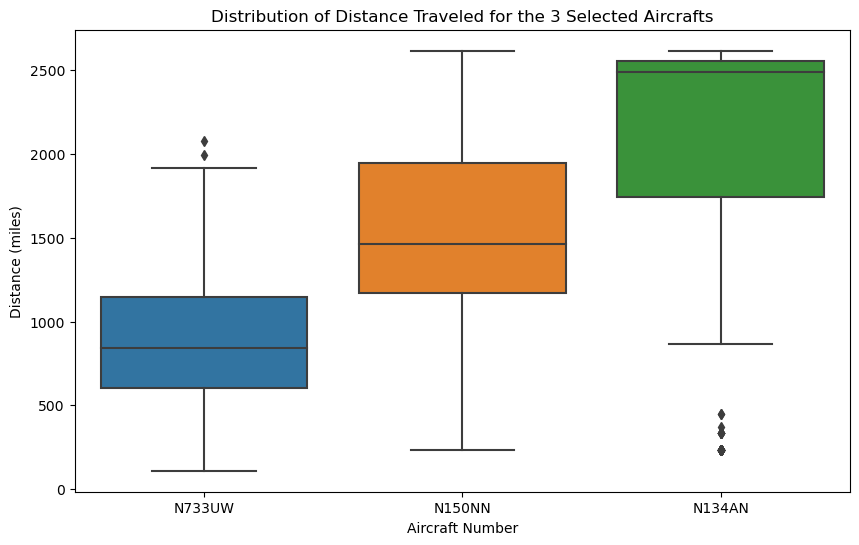

Aircraft: N150NN
Mean Distance Traveled: 0.00 miles
Median Distance Traveled: 0.00 miles
Minimum Distance Traveled: 0.00 miles
Maximum Distance Traveled: 0.00 miles
Standard Deviation of Distance Traveled: 0.00 miles


/var/folders/fl/3gp5ysz57ss09fmjlt6fl_r00000gn/T/ipykernel_40794/755155894.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aircraft_values['DISTANCE'] = pd.to_numeric(aircraft_data['DISTANCE'], errors='coerce')
/var/folders/fl/3gp5ysz57ss09fmjlt6fl_r00000gn/T/ipykernel_40794/755155894.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aircraft_values['DISTANCE'].fillna(0, inplace=True)


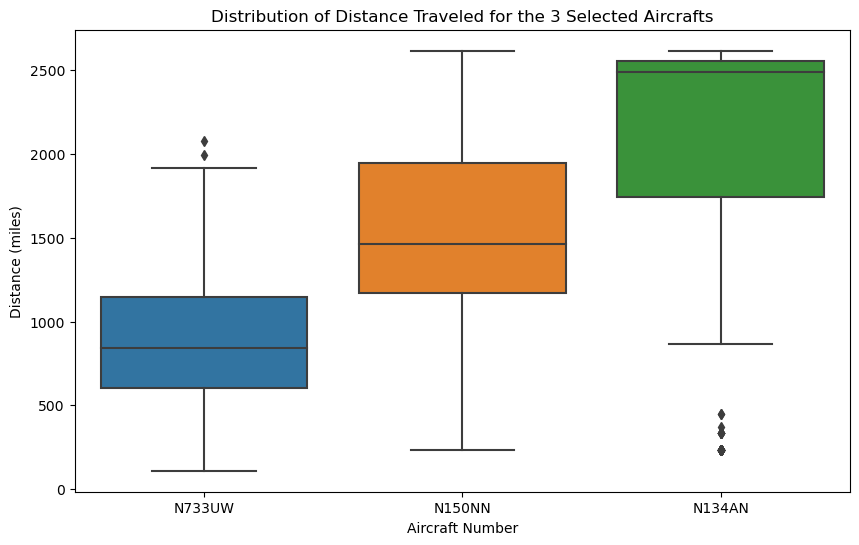

Aircraft: N134AN
Mean Distance Traveled: 2001.63 miles
Median Distance Traveled: 2486.00 miles
Minimum Distance Traveled: 236.00 miles
Maximum Distance Traveled: 2615.00 miles
Standard Deviation of Distance Traveled: 707.35 miles


/var/folders/fl/3gp5ysz57ss09fmjlt6fl_r00000gn/T/ipykernel_40794/755155894.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aircraft_values['DISTANCE'] = pd.to_numeric(aircraft_data['DISTANCE'], errors='coerce')
/var/folders/fl/3gp5ysz57ss09fmjlt6fl_r00000gn/T/ipykernel_40794/755155894.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aircraft_values['DISTANCE'].fillna(0, inplace=True)


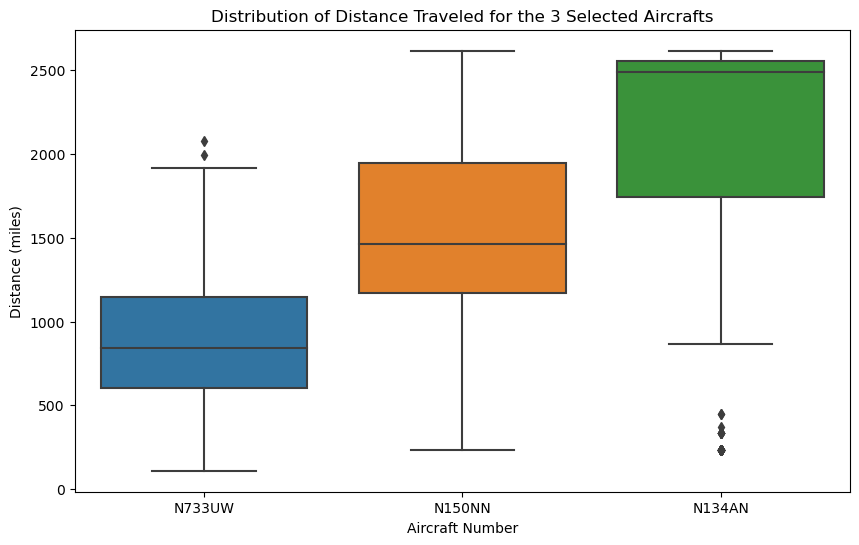

In [20]:
# creates and print summary statistics per aircraft
for aircraft in selected_aircrafts:
    print(f"Aircraft: {aircraft}")

    # limits data specific for selected aircraft
    aircraft_values = decreased_df[decreased_df['TAIL_NUM'] == aircraft]

    # ensure distance category is numeric and changes invalid values
    aircraft_values['DISTANCE'] = pd.to_numeric(aircraft_data['DISTANCE'], errors='coerce')
    aircraft_values['DISTANCE'].fillna(0, inplace=True)

    # calculate summary statistics for each distance
    mean_dist = aircraft_values['DISTANCE'].mean()
    median_dist = aircraft_values['DISTANCE'].median()
    min_dist = aircraft_values['DISTANCE'].min()
    max_dist = aircraft_values['DISTANCE'].max()
    std_dev_dist = aircraft_values['DISTANCE'].std()

    # print summary statistics
    print(f"Mean Distance Traveled: {mean_dist:.2f} miles")
    print(f"Median Distance Traveled: {median_dist:.2f} miles")
    print(f"Minimum Distance Traveled: {min_dist:.2f} miles")
    print(f"Maximum Distance Traveled: {max_dist:.2f} miles")
    print(f"Standard Deviation of Distance Traveled: {std_dev_dist:.2f} miles")

  # create boxplot to visualize each aircraft's summary statistics
    plt.figure(figsize = (10, 6))
    sns.boxplot(data = decreased_df[decreased_df['TAIL_NUM'].isin(selected_aircrafts)], x = 'TAIL_NUM', y = 'DISTANCE')
    plt.title('Distribution of Distance Traveled for the 3 Selected Aircrafts')
    plt.xlabel('Aircraft Number')
    plt.ylabel('Distance (miles)')
    plt.show()

From the graphs, the means distance for all 3 aircrafts contains a large disparity. Aircraft N134AN has a mean much higher than N733UW and N150NN, being 2001.63 miles. The maximum of 2615.00 miles exceeds that of N733UW and N150NN, potentially indicating this carrier is mostly used for longer haul flights.

This project analyzed airline performance, flight times, arrival and departure delays inckuding connecting flights, and distances traveled for flights originating from or departing to California, Nevada, and Arizona. The visualizations reflect the airline's efficiency and overall flight operations. Additionally, these findings are helpful for drawing comparisons across airlines, highlighting key differences in delays, flight times, and travel distances to streamline decision-making for travelers and airline operations to improve efficiency, optimize routes, and enhance customer experience.

3 Key Findings

1. Southwest Airlines had the highest total flight hours compared to other carriers. This coupled with the airline having the highest proportion of flights from AZ, CA, and NV shows how dominant this airline carrier is in the respective region.
2. While all three selected airplanes were under American Airlines, they greatly differed in maximum distance traveled. This can be attributed to the airline's organization to permanently designate certain carriers to routes.
3. San Francisco Airport had the greatest delays in the month of December, California had the greatest number of flights compared to AZ and NV, and also greater arrival/departure delays. These consistent findings show how air travel is affected by the state's populationa and travel frequency.